# Spikewarp 17

author: steeve.laquitaine@epfl.ch 

**method**:

* 10 minutes of simulation done by James Isbister
* We did not do 2X acceleration by taking every second sample of the recording
* delta_time: 1.3 ms

* created 3 datasets:
    * SortingExtractor
    * Ground truth SortingExtractor
    * Sorted units bias classification dataset
    * Agreement scores

Status:
* All datasets were created

### Setup

setup spikeinterf... env


In [1]:
%load_ext autoreload
%autoreload 2
import os 
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np

# set project path
proj_path = "/gpfs/bbp.cscs.ch/project/proj85/home/laquitai/spikebias/"
os.chdir(proj_path)

from src.nodes.utils import get_config
import spikeinterface as si
from src.nodes.metrics.quality import get_scores
from src.nodes import utils

# DATASETS

# NPX PROBE
# Synthetic (10m)
cfg, _ = get_config("others/spikewarp", "2024_10_08").values()
GT = cfg["sorting"]["simulation"]["ground_truth"]["output"]
GT_10m = cfg["sorting"]["simulation"]["ground_truth"]["10m"]["output"]
KS4 = cfg["sorting"]["sorters"]["kilosort4"]["10m"]["output"]
KS3 = cfg["sorting"]["sorters"]["kilosort3"]["10m"]["output"]
KS2_5 = cfg["sorting"]["sorters"]["kilosort2_5"]["10m"]["output"]
KS2 = cfg["sorting"]["sorters"]["kilosort2"]["10m"]["output"]
KS = cfg["sorting"]["sorters"]["kilosort"]["10m"]["output"]
HS = cfg["sorting"]["sorters"]["herdingspikes"]["10m"]["output"]

DELTA_TIME = 1.3

quality_path = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/postprocessing/biophy/17_spikesorting_stimulus_test_neuropixels_8-10-24__8slc_60f_72r_250t_200ms_0/a9bf068a-b940-4514-9e6c-6055283272cc/analysis/sorting_quality/sorting_quality.csv"
score_path = "/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/postprocessing/biophy/17_spikesorting_stimulus_test_neuropixels_8-10-24__8slc_60f_72r_250t_200ms_0/a9bf068a-b940-4514-9e6c-6055283272cc/analysis/scores/"

2024-11-11 18:43:33,685 - root - utils.py - get_config - INFO - Reading experiment config.
2024-11-11 18:43:33,688 - root - utils.py - get_config_spikewarp - INFO - conf/others/spikewarp/2024_10_08 config
2024-11-11 18:43:33,720 - root - utils.py - get_config - INFO - Reading experiment config. - done


### Paths sortingExtractors

In [21]:
print(cfg["sorting"]["sorters"]["kilosort4"]["10m"]["output"])

/gpfs/bbp.cscs.ch/project/proj85/scratch/laquitai/preprint_2024/sorting/0_silico/17_spikesorting_stimulus_test_neuropixels_8-10-24__8slc_60f_72r_250t_200ms_0/a9bf068a-b940-4514-9e6c-6055283272cc/SortingKS4/


### Ground truth

* get first 10 minutes

In [2]:
# get ten first minutes of ground truth SortingExtractor
SortingTrue = si.load_extractor(GT)
SortingTrue = SortingTrue.frame_slice(
    start_frame=0, end_frame=10 * 60 * SortingTrue.sampling_frequency
)
SortingTrue.save(folder=GT_10m, n_jobs=-1, total_memory="2G", overwrite=True)
SortingTrue = si.load_extractor(GT_10m)

### Check metadata exist

In [3]:
assert (
    si.load_extractor(KS4).get_property("layer") is None
) == False, "run postprocessing"
assert (
    si.load_extractor(KS3).get_property("layer") is None
) == False, "run postprocessing"
assert (
    si.load_extractor(KS2_5).get_property("layer") is None
) == False, "run postprocessing"
assert (
    si.load_extractor(KS2).get_property("layer") is None
) == False, "run postprocessing"
assert (
    si.load_extractor(KS).get_property("layer") is None
) == False, "run postprocessing"
assert (
    si.load_extractor(HS).get_property("layer") is None
) == False, "run postprocessing"

### Agreement scores

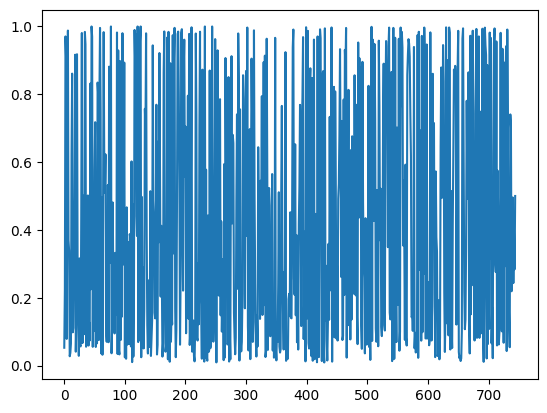

In [4]:
SAVE = False

# KS4
scores4 = get_scores(SortingTrue, si.load_extractor(KS4), DELTA_TIME)
# KS3
scores3 = get_scores(SortingTrue, si.load_extractor(KS3), DELTA_TIME)
# KS2.5
scores25 = get_scores(SortingTrue, si.load_extractor(KS2_5), DELTA_TIME)
# KS2
scores2 = get_scores(SortingTrue, si.load_extractor(KS2), DELTA_TIME)
# KS
scores1 = get_scores(SortingTrue, si.load_extractor(KS), DELTA_TIME)
# HS
scoresH = get_scores(SortingTrue, si.load_extractor(HS), DELTA_TIME)

# save
if SAVE:
    utils.create_if_not_exists(score_path)
    scores4.to_csv(score_path + "ks4.csv", index=True)
    scores3.to_csv(score_path + "ks3.csv", index=True)
    scores25.to_csv(score_path + "ks25.csv", index=True)
    scores2.to_csv(score_path + "ks2.csv", index=True)
    scores1.to_csv(score_path + "ks.csv", index=True)
    scoresH.to_csv(score_path + "hs.csv", index=True)

# plot
plt.plot(scores4.max())

In [ ]:
# check agreement score dataset
pd.read_csv(score_path + "ks4.csv")

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,735,736,737,738,739,740,741,742,743,744
0,12165,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000824,0.000000,0.0
1,16652,0.000000,0.0,0.000000,0.000000,0.000495,0.000000,0.000000,0.000000,0.000000,...,0.000830,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,17923,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,18371,0.000000,0.0,0.000000,0.000847,0.000000,0.000000,0.000348,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,19690,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1416,4217493,0.000000,0.0,0.000000,0.000817,0.000000,0.000000,0.000000,0.003663,0.000000,...,0.000766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000758,0.000000,0.0
1417,4221920,0.000534,0.0,0.000719,0.003980,0.002456,0.000000,0.003820,0.000000,0.000535,...,0.001402,0.002861,0.000527,0.002395,0.001479,0.000499,0.000468,0.002095,0.001849,0.0
1418,4228700,0.000807,0.0,0.003266,0.002341,0.004628,0.000000,0.003403,0.000000,0.000000,...,0.002706,0.004783,0.000000,0.001373,0.000000,0.000000,0.001997,0.004041,0.001306,0.0
1419,4229218,0.000000,0.0,0.000000,0.000873,0.000000,0.000000,0.000352,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [18]:
scores = pd.read_csv(score_path + "ks4.csv").iloc[:, 1:]
print(sum(scores.max(axis=1) >= 0.8), "good units")
print(sum(scores.max(axis=1) >= 0.8) / scores.shape[0])

156 good units
0.10978184377199156


### Sorted unit categorization

* compute with: `sbatch cluster/analysis/spikewarp/sparse/sorting_quality.sh`

In [6]:
# load dataset
quality_df = pd.read_csv(quality_path)

# report
display("Sorted unit classification table:\n")
display(quality_df)
print("Tested spike sorters:", quality_df["sorter"].unique())

'Sorted unit classification table:\n'

,sorted,quality,layer,sorter,experiment
0,752,good,L2/3,KS2.5,E
1,3,mixed: good + overmerger + oversplitter,L2/3,KS4,E
2,328,mixed: good + overmerger + oversplitter,L5,KS2,E
3,326,mixed: good + overmerger + oversplitter,L5,KS2,E
4,321,mixed: good + overmerger + oversplitter,L5,KS2,E
...,...,...,...,...,...
3028,9,oversplitter,L4,KS2,E
3029,1323,oversplitter,L6,KS,E
3030,833,oversplitter,L2/3,KS,E
3031,7,oversplitter,L4,KS2,E


Tested spike sorters: ['KS2.5' 'KS4' 'KS2' 'KS' 'HS' 'KS3']


In [7]:
# quick sanity check: proportion of high-quality single-units
# ks3
good_ks3 = quality_df.loc[(quality_df.sorter == "KS3"), "quality"].str.contains("good")
print(sum(good_ks3) / len(good_ks3))
# ks2
good_ks2 = quality_df.loc[(quality_df.sorter == "KS2"), "quality"].str.contains("good")
print(sum(good_ks2) / len(good_ks2))

0.4129032258064516
0.35608856088560886
